# Scattering by a sound-hard sphere

### Arnold D. Kim
*Department of Applied Mathematics, University of California, Merced*

In [1]:
# ask python to produce a time stamp

import  time
print( 'Last updated: %s' %time.strftime('%d/%m/%Y') )

Last updated: 05/06/2020


In [2]:
# import libraries for the codes below

import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt

## Problem description

We seek to solve the following scattering problem for a sound-hard sphere,
\begin{gather*}
  (\nabla^{2} + k^{2}) u = 0 \quad \text{in $r > a$},\\
  \partial_{n} u = 0, \quad \text{on $r = a$}.
\end{gather*}
Let $u = u^{\text{inc}} + u^{s}$ with $u^{\text{inc}}$ denoting the incident field satisfying
\begin{equation}
   ( \nabla^{2} + k^{2} ) u^{\text{inc}} = 0
\end{equation}
in the whole space and $u^{s}$ denoting the scattered field satisfying
\begin{gather*}
  (\nabla^{2} + k^{2}) u^{s} = 0 \quad \text{in $r > a$},\\
  \partial_{n} u^{s} = -\partial_{n} u^{\text{inc}}, \quad \text{on $r = a$}.
\end{gather*}
We additionally require that $u^{s}$ satisfies the Sommerfeld radiation condition,
\begin{equation}
   \lim_{\xi \to \infty} \int_{|x| = \xi} \left( \partial_{r} u^{s} - \mathrm{i} k u^{s} \right) \mathrm{d}S = 0.
\end{equation}

In what follows, we seek to compute the scattered field, $u^{s}$ when
\begin{equation}
   u^{\text{inc}} = e^{\mathrm{i} k z}.
\end{equation}
We seek $u^{s}$ as an expansion in spherical harmonics,
\begin{equation}
   Y_{n m}(\theta,\varphi) = \sqrt{ \frac{2 n + 1}{4\pi} \frac{(n - m)!}{(n + m)!} }
   P_{n}^{m}(\cos\theta) e^{-\mathrm{i} m \varphi}.
\end{equation}
Note that we have used the convention for normalization used in the [spherical harmonics page on Wikipedia](https://en.wikipedia.org/wiki/Spherical_harmonics).

## Harmonic expansion for a plane wave

We consider the following harmonic expansion for a plane wave (see Jackson, *Classical Electrodynamics* (10.45)),
\begin{align}
   e^{\mathrm{i} k z} &= \sum_{n = 0}^{\infty} (\mathrm{i})^{n} \sqrt{4 \pi (2 n + 1)} j_{n}(k r) 
   Y_{n,0}(\theta,\varphi) \\
   &= \sum_{n = 0}^{\infty} e^{\mathrm{i} n \pi/2} ( 2 n + 1 ) j_{n}(k r) 
   P_{n}(\cos\theta).
\end{align}
To obtain the second result, we make use of the [special case](https://en.wikipedia.org/wiki/Spherical_harmonics#Special_cases_and_values)
\begin{equation}
   Y_{n,0}(\theta,\varphi) = \sqrt{\frac{2 n + 1}{4\pi}} P_{n}(\cos\theta).
\end{equation}

Using this expansion, we find that
\begin{equation}
   \partial_{r} e^{\mathrm{i} k z} = 
   \sum_{n = 0}^{\infty} e^{\mathrm{i} n \pi/2}  
   ( 2 n + 1 ) \partial_{r} j_{n}(k r) P_{n}(\cos\theta).
\end{equation}
Let
\begin{equation}
   B_{n} = e^{\mathrm{i} n \pi/2} ( 2 n + 1 ).
\end{equation}
This expansion is to be used as the normal derivative of the incident field on a sound-hard sphere.

The function below computes these expansion coefficients.

In [16]:
def ComputeIncidentHarmonicExpansionCoeffs( N ):
    """
    This function computes the expansion coefficients for the field 
    scattered by a sound-hard sphere due to counter-propagating plane
    waves incident on it.
    """
    # compute an array of indices from n = 0 to n = N
    
    n = np.arange( N )
    
    # compute the expansion coefficients

    B_n = np.exp( 1j * n * np.pi / 2.0 ) * ( 2 * n + 1 ) 
    
    return B_n;

## Harmonic expansion for the scattered field

We write the field scattered by a sphere in spherical coordinates as
\begin{equation}
   u^{s}(r,\theta,\varphi) = \sum_{n = 0}^{\infty} \sum_{m = -n}^{n} c_{n m} h_{n}^{(1)}(k r) 
   Y_{n m}(\theta,\varphi).
\end{equation}
Here, $h_{n}^{(1)}(x)$ denotes the [spherical Hankel function](https://en.wikipedia.org/wiki/Bessel_function#Spherical_Hankel_functions) of the first kind of order zero. In terms of spherical Bessel functions $j_{n}(x)$ and $y_{n}(x)$, 
\begin{equation}
   h_{\ell}^{(1)}(x) = j_{n}(x) + \mathrm{i} y_{n}(x).
\end{equation}
This expansion in spherical harmonics is a solution of Helmholtz's equation. All that remains to be determined are the expansion coefficients, $c_{n m}$.

For the rotationally invariant incident plane wave defined above, the scattered field will be rotationally symmetric about the $z$-axis (independent of $\varphi$) and therefore this harmonic expansion for the scattered field reduces to
\begin{equation}
   u^{s} = \sum_{n = 0}^{\infty} \sqrt{\frac{2n+1}{4\pi}} C_{n} h_{n}^{(1)}(k r) P_{n}(\cos\theta).
\end{equation}
It follows that
\begin{equation}
   \partial_{r} u^{s} = \sum_{n = 0}^{\infty} \sqrt{\frac{2n+1}{4\pi}} C_{n} \partial_{r} 
   h_{n}^{(1)}(k r) P_{n}(\cos\theta).
\end{equation}
For a sound-hard sphere, $\partial_{r} ( u^{\text{inc}} + u^{s} ) = 0$ on $r = a$. Thus, we find that
\begin{equation}
   C_{n} = -\sqrt{\frac{4\pi}{2n+1}} \frac{\partial_{r} j_{n}(k a)}{\partial_{r} h_{n}^{(1)}(k a)} B_{n}.    
\end{equation}
The function below computes these expansion coefficients.

In [ ]:
def ComputeScatteredHarmonicExpansionCoeffs( ka, N ):
    """
    This function computes the expansion coefficients for the field 
    scattered by a sound-hard sphere due to counter-propagating plane
    waves incident on it.
    """
    # compute the expansion coefficients for the incident field
    
    B_n = ComputeIncidentHarmonicExpansionCoeffs( N )
    
    # compute an array of indices from n = 0 to n = N
    
    n = np.arange( N )
    
    # compute the derivative of the spherical Bessel function
    
    Djn = k * sp.spherical_jn( n, ka, derivative = True )
    
    # compute the derivative of the spherical Hankel function
    
    Dh1n = k * sp.spherical_jn( n, ka, derivative = True ) \
        + k * 1j * sp.spherical_yn( n, ka, derivative = True )
    
    # compute the expansion coefficients

    C_n = -np.sqrt( 4.0 * np.pi / ( 2 * n + 1 ) ) * Djn / Dh1n * B_n
    
    return C_n;

## Compute Legendre polynomials

To evaluate the scattered field, $u^{s}$, we require the Legendre polynomials. To compute them, let $\mu = \cos\theta$. We use $P_{0}(\mu) = 1$ and $P_{1}(\mu) = \mu$. Then we use the [recurrance relation](https://en.wikipedia.org/wiki/Legendre_polynomials#Recurrence_relations),
\begin{equation}
   P_{n+1}(\mu) = \frac{(2n+1) \mu P_{n}(\mu) - n P_{n-1}(\mu)}{n+1}, \quad n = 1, 2, \cdots.
\end{equation}

The code below computes a matrix whose $n$th column is the evaluation of the Legendre polynomial of degree $n$ on the grid points given by the vector $\mu$.

In [5]:
def ComputeLegendrePolynomials( μ, N ):
    """ 
    This function computes the Gauss-Legendre quadrature rule of order N and evaluates 
    the Legendre polynomials at the Gauss-Legendre quadrature points up to degree N-1.
    
    This function returns the Gauss-Legendre quadrature points mu, quadrature weights wt,
    and a matrix whose columns are the Legendre polynomials evaluated on mu.
    """
    
    # allocate memory for the matrix of Legendre polynomials

    Pn = np.full( ( μ.size, N ), 'nan', dtype = 'complex' )
    
    # compute the Legendre polynomial of degree 0
    
    Pn[:,0] = 1
    
    # compute the Legendre polynomial of degree 1
    
    Pn[:,1] = μ

    # compute the remaining Legendre polynomials using the recursion relation
    
    for n in range( 1, N - 1 ):
    
        Pn[:,n+1] = ( ( 2 * n + 1 ) * μ * Pn[:,n] - n * Pn[:,n-1] ) / ( n + 1 )
        
    return Pn;

## Specific example: set physical parameters

The following code sets the physical parameters for a specific problem.

In [36]:
# set the frequency of the acoustic waves (kHz)

f = 40.0

# set the wave speed (cm kHz)

c0 = 34.3

# set the density of the spheres (g/cm^3)

ρ0 = 0.001225

# set the compressibility

κ0 = 1.0 / ( ρ0 * c0 ** 2 )

# compute the circular frequency

ω = 2.0 * np.pi * f

# compute the wavenumber (cm^-1)

k = ω / c0

# set the nondimensional size parameter ka

ka = 2.5

## Example: compute the expansion coefficients

The code below calls the functions defined above for computing the expansion coefficients for the incident and scattered fields.

In [37]:
# set the number of modes

N = 16

# compute the harmonic expansion coefficients

B_n = ComputeIncidentHarmonicExpansionCoeffs( N )
C_n = ComputeScatteredHarmonicExpansionCoeffs( ka, N )

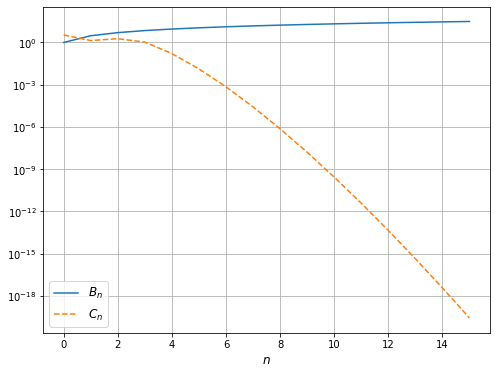

In [38]:
# plot the coefficients

n = np.arange( N )

plt.semilogy( n, np.abs( B_n ), n, np.abs( C_n ), '--' )
plt.grid()
plt.xlabel( r'$n$', fontsize = 12 )
plt.legend( (r'$B_{n}$',r'$C_{n}$'), fontsize = 12 )

plt.show()

## Example: check the boundary condition

In the following code, we evaluate the normal derivatives of the incident and scattered fields to see if the boundary condition is satisfied.

In [39]:
# check boundary condition is satisfied

μ = np.linspace( -1.0, 1.0, 51 )

# compute the Legendre polynomials

P = ComputeLegendrePolynomials( μ, N )

# compute the normal derivative of the spherical Bessel function

Djn = k * sp.spherical_jn( n, ka, derivative = True )

# compute the normal derivative of the spherical Hankel function

Dh1n = k * sp.spherical_jn( n, ka, derivative = True ) \
    + k * 1j * sp.spherical_yn( n, ka, derivative = True )

# compute the fields using the harmonic expansions

DnU_inc = P @ ( Djn * B_n )
DnU_s   = P @ ( np.sqrt( ( 2 * n + 1 ) / ( 4.0 * np.pi ) ) * Dh1n * C_n )

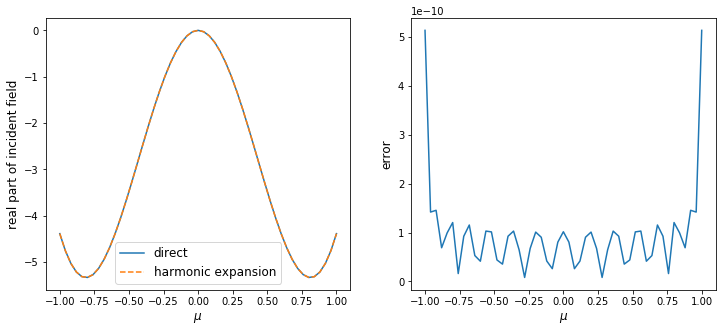

In [47]:
# plot the normal derivative of the incident field

# compute the normal derivative of the scattered field

f = 1j * k * μ * np.exp( 1j * ka * μ )

# plot the results

plt.rcParams['figure.figsize'] = [12,5]

plt.subplot(1,2,1)
plt.plot( μ, np.real( f ), μ, np.real( DnU_inc ), '--' )
plt.xlabel( r'$\mu$', fontsize = 12 )
plt.ylabel( 'real part of incident field', fontsize = 12 )
plt.legend( ('direct','harmonic expansion'), fontsize = 12 )

plt.subplot(1,2,2)
plt.plot( μ, np.abs( f - DnU_inc ) )
plt.xlabel( r'$\mu$', fontsize = 12 )
plt.ylabel( 'error', fontsize = 12 )

plt.show()

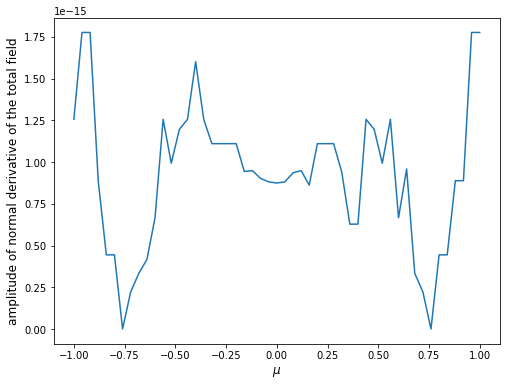

In [48]:
# plot the normal derivative of the total field

plt.rcParams['figure.figsize'] = [8,6]

plt.plot( μ, np.abs( DnU_inc + DnU_s ) )
plt.xlabel( r'$\mu$', fontsize = 12 )
plt.ylabel( 'amplitude of normal derivative of the total field', fontsize = 12 )

plt.show()

## Example: compute the field on the sphere

In the code below, we compute the field on $r = a$.

In [42]:
# compute the field on the sphere

# compute the spherical Bessel function

jn = sp.spherical_jn( n, ka, derivative = False )

# compute the spherical Hankel function

h1n = sp.spherical_jn( n, ka, derivative = False ) \
    + 1j * sp.spherical_yn( n, ka, derivative = False )

# compute the fields using the harmonic expansions

U_inc = P @ ( jn * B_n )
U_s   = P @ ( np.sqrt( ( 2 * n + 1 ) / ( 4.0 * np.pi ) ) * h1n * C_n )

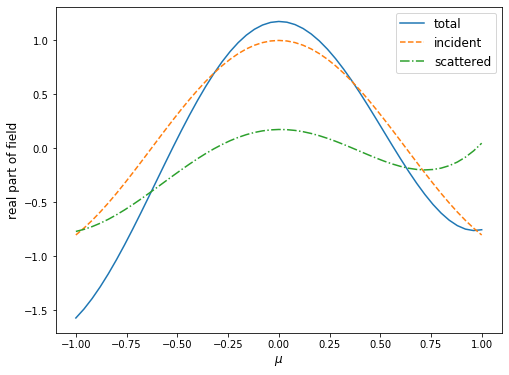

In [46]:
# plot the total field

plt.rcParams['figure.figsize'] = [8,6]

plt.plot( μ, np.real( U_inc + U_s ), μ, np.real( U_inc ), '--', μ, np.real( U_s ), '-.' )
plt.xlabel( r'$\mu$', fontsize = 12 )
plt.ylabel( 'real part of field', fontsize = 12 )
plt.legend( ('total','incident','scattered'), fontsize = 12 )

plt.show()